In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
data_courses=pd.read_csv("courses.csv")
data_assessments=pd.read_csv("assessments.csv")
data_studentAssessment=pd.read_csv("studentAssessment.csv")
data_studentInfo=pd.read_csv("studentInfo.csv")
data_studentRegistration=pd.read_csv("studentRegistration.csv")

display(data_courses)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240
5,BBB,2014B,234
6,CCC,2014J,269
7,CCC,2014B,241
8,DDD,2013J,261
9,DDD,2014J,262


# melakukan cleaning data dalam dataset data assessment

In [5]:
for i in range(0,data_assessments.shape[0]):
    if data_assessments.iloc[[i]]["date"].values[0]=='?':
        
        code_module=data_assessments.iloc[[i]]["code_module"].values[0]
        code_presentation=data_assessments.iloc[[i]]["code_presentation"].values[0]
               
        module_presentation_length=data_courses[(data_courses["code_module"]==code_module)&
                                                (data_courses["code_presentation"]==code_presentation)]["module_presentation_length"].values[0]
        
        data_assessments.at[i,"date"] = module_presentation_length
                

data_assessments[4:]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


# mengelompokkan data id_assessment, dates dan weights berdasarkan code_module dan code_presentation dalam dataset assessment

In [7]:
courses=[]
for i in range(0,data_assessments.shape[0]):
    
    code_module=data_assessments.iloc[[i]]["code_module"].values[0]
    code_presentation=data_assessments.iloc[[i]]["code_presentation"].values[0]
    
    courses.append((code_module,code_presentation))

courses=list(set(courses))

coursed_det={"code_module":[],"code_presentation":[],"id_assessments":[],"dates":[],"weights":[]}
for (arg1,arg2) in courses:
    dum=data_assessments[(data_assessments["code_module"]==arg1) & (data_assessments["code_presentation"]==arg2)]
    dum=dum[dum["assessment_type"] != "Exam"]

    coursed_det["code_module"].append(arg1)
    coursed_det["code_presentation"].append(arg2)
    
    dates=dum["date"].values
    dates=np.array([float(i) for i in dates])
    dates=dates
    ind=np.argsort(dates)
    dates=dates[ind]
    
    weights=dum["weight"].values
    weights=np.array([float(i) for i in weights])
    weights=weights[ind]/100.0
    
    id_assessment=dum["id_assessment"].values
    id_assessment=np.array([int(i) for i in id_assessment])
    id_assessment=id_assessment[ind]

    coursed_det["dates"].append(dates)
    coursed_det["weights"].append(weights)
    coursed_det["id_assessments"].append(id_assessment)
    
coursed_det=pd.DataFrame(coursed_det)
display(coursed_det)

,code_module,code_presentation,id_assessments,dates,weights
0,GGG,2014J,"[37435, 37436, 37437, 37438, 37439, 37440, 374...","[61.0, 124.0, 173.0, 229.0, 229.0, 229.0, 229....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,EEE,2014B,"[30714, 30715, 30716, 30717]","[33.0, 68.0, 117.0, 152.0]","[0.16, 0.28, 0.28, 0.28]"
2,FFF,2014J,"[34899, 34900, 34901, 34902, 34903, 34904, 349...","[24.0, 52.0, 94.0, 136.0, 199.0, 241.0, 241.0,...","[0.125, 0.125, 0.25, 0.25, 0.25, 0.0, 0.0, 0.0..."
3,AAA,2013J,"[1752, 1753, 1754, 1755, 1756]","[19.0, 54.0, 117.0, 166.0, 215.0]","[0.1, 0.2, 0.2, 0.2, 0.3]"
4,BBB,2013J,"[14996, 14997, 15003, 15004, 14998, 15005, 149...","[19.0, 47.0, 54.0, 96.0, 96.0, 131.0, 131.0, 1...","[0.05, 0.18, 0.01, 0.01, 0.18, 0.01, 0.18, 0.0..."
5,DDD,2013J,"[25348, 25349, 25350, 25351, 25352, 25353]","[25.0, 53.0, 88.0, 123.0, 165.0, 207.0]","[0.1, 0.125, 0.175, 0.2, 0.2, 0.2]"
6,AAA,2014J,"[1758, 1759, 1760, 1761, 1762]","[19.0, 54.0, 117.0, 166.0, 215.0]","[0.1, 0.2, 0.2, 0.2, 0.3]"
7,EEE,2013J,"[30709, 30710, 30711, 30712]","[33.0, 68.0, 124.0, 159.0]","[0.16, 0.28, 0.28, 0.28]"
8,BBB,2014J,"[15020, 15021, 15022, 15023, 15024]","[19.0, 54.0, 110.0, 152.0, 201.0]","[0.0, 0.1, 0.2, 0.35, 0.35]"
9,DDD,2014J,"[25362, 25363, 25364, 25365, 25366, 25367]","[20.0, 41.0, 62.0, 111.0, 146.0, 195.0]","[0.05, 0.1, 0.1, 0.25, 0.25, 0.25]"


## Melakukan cleaning dataset studentAssessment 

In [8]:
print(" ? in date_submitted:",data_studentAssessment[data_studentAssessment["date_submitted"]=='?'].shape[0])
print(" ? in is_banked:",data_studentAssessment[data_studentAssessment["is_banked"]=='?'].shape[0])
print(" 1 in is_banked:",data_studentAssessment[data_studentAssessment["is_banked"]==1].shape[0])
print(" ? in score:",data_studentAssessment[data_studentAssessment["score"]=='?'].shape[0])

data_studentAssessment['score'] = pd.to_numeric(data_studentAssessment['score'],errors='coerce')

for ind in data_studentAssessment.index[data_studentAssessment["score"].isna()].tolist():
    
    id_assessment=data_studentAssessment.iloc[[ind]]["id_assessment"].values[0]    
    medval=data_studentAssessment[data_studentAssessment["id_assessment"]==id_assessment]["score"].median()

    data_studentAssessment.at[ind,"score"]=medval


print(" ? in score:",data_studentAssessment[data_studentAssessment["score"]=='?'].shape[0])

data_studentAssessment

 ? in date_submitted: 0
 ? in is_banked: 0
 1 in is_banked: 1909
 ? in score: 0
 ? in score: 0


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [9]:
print(data_studentInfo.shape)
data_studentInfo

(32593, 12)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [10]:
data_SA_asmbl={"code_module":[],"code_presentation":[],"id_student":[]}
data_SA_asmbl.update({"CS20":[],"CS40":[],"CS60":[],"CS80":[],"CS100":[]})
data_SA_asmbl.update({"PCS20":[],"PCS40":[],"PCS60":[],"PCS80":[],"PCS100":[]})
data_SA_asmbl.update({"LS20":[],"LS40":[],"LS60":[],"LS80":[],"LS100":[]})
data_SA_asmbl.update({"RS20":[],"RS40":[],"RS60":[],"RS80":[],"RS100":[]})

for i in tqdm(range(0,data_studentInfo.shape[0])):
        
    code_module=data_studentInfo.iloc[[i]]["code_module"].values[0]
    code_presentation=data_studentInfo.iloc[[i]]["code_presentation"].values[0]
    id_student=data_studentInfo.iloc[[i]]["id_student"].values[0] 

    data_SA_asmbl["code_module"].append(code_module)
    data_SA_asmbl["code_presentation"].append(code_presentation)
    data_SA_asmbl["id_student"].append(id_student)

    dum=coursed_det[(coursed_det["code_module"]==code_module) & (coursed_det["code_presentation"]==code_presentation)]
    
    dates=dum["dates"].values[0]
    
    id_assessments=dum["id_assessments"].values[0]
    weights=dum["weights"].values[0]
          
    scores_each=[]
    date_submitted_each=[]
    for id_assessment in id_assessments:
        
        dum1=data_studentAssessment[(data_studentAssessment["id_student"]==id_student) & (data_studentAssessment["id_assessment"]==id_assessment)]["score"].values
        if dum1.shape[0]!=0:
            scores_each.append(dum1[0])
        else:
            scores_each.append(0.0)
        
        dum1=data_studentAssessment[(data_studentAssessment["id_student"]==id_student) & (data_studentAssessment["id_assessment"]==id_assessment)]["date_submitted"].values
        if dum1.shape[0]!=0:
            date_submitted_each.append(dum1[0])
        else:
            date_submitted_each.append(0)
        
    scores_each=np.asarray(scores_each).astype(np.float64)
    date_submitted_each=np.asarray(date_submitted_each)
        
    cum_score=np.cumsum(scores_each*weights)
    prcnt_cum_score=(cum_score+1e-16)/(np.cumsum(weights)*100+1e-16)*100
    late_submission=np.cumsum((dates-date_submitted_each)<0)
    scores_each=np.cumsum(scores_each)/np.arange(1,scores_each.shape[0]+1)
    
    module_presentation_length=data_courses[(data_courses["code_module"]==code_module)&
                                            (data_courses["code_presentation"]==code_presentation)]["module_presentation_length"].values[0]

    for prcnt in np.arange(0.20,1.01,0.20):
        
        ind=np.where(dates/(module_presentation_length+1e-16)<=prcnt)
        
        if ind[0].shape[0]!=0:      
            data_SA_asmbl["CS"+str(int(prcnt*100))].append(cum_score[ind[0][-1]])
            data_SA_asmbl["PCS"+str(int(prcnt*100))].append(prcnt_cum_score[ind[0][-1]])
            data_SA_asmbl["LS"+str(int(prcnt*100))].append(late_submission[ind[0][-1]])
            data_SA_asmbl["RS"+str(int(prcnt*100))].append(scores_each[ind[0][-1]])
        else:
            data_SA_asmbl["CS"+str(int(prcnt*100))].append(cum_score[0]*100)
            data_SA_asmbl["PCS"+str(int(prcnt*100))].append(prcnt_cum_score[0])
            data_SA_asmbl["LS"+str(int(prcnt*100))].append(late_submission[0])
            data_SA_asmbl["RS"+str(int(prcnt*100))].append(scores_each[0])

data_SA_asmbl=pd.DataFrame(data_SA_asmbl)

display(data_SA_asmbl)

100%|██████████| 32593/32593 [06:27<00:00, 84.02it/s] 


,code_module,code_presentation,id_student,CS20,CS40,CS60,CS80,CS100,PCS20,PCS40,...,LS20,LS40,LS60,LS80,LS100,RS20,RS40,RS60,RS80,RS100
0,AAA,2013J,11391,7.8,24.8,40.8,57.8,82.4,7.800000e+01,8.266667e+01,...,0,0,0,0,0,78.0,81.5,81.000000,82.000000,82.000000
1,AAA,2013J,28400,7.0,20.6,34.6,47.4,65.4,7.000000e+01,6.866667e+01,...,1,1,2,2,2,70.0,69.0,69.333333,68.000000,66.400000
2,AAA,2013J,30268,0.0,0.0,0.0,0.0,0.0,1.000000e-15,3.333333e-16,...,0,0,0,0,0,0.0,0.0,0.000000,0.000000,0.000000
3,AAA,2013J,31604,7.2,21.4,36.2,53.8,76.3,7.200000e+01,7.133333e+01,...,0,0,0,0,0,72.0,71.5,72.333333,76.250000,76.000000
4,AAA,2013J,32885,6.9,12.9,25.5,32.5,55.0,6.900000e+01,4.300000e+01,...,1,2,3,4,5,69.0,49.5,54.000000,49.250000,54.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,0.0,0.0,0.0,0.0,0.0,1.000000e+02,1.000000e+02,...,0,0,0,0,0,0.0,0.0,0.000000,0.000000,0.000000
32589,GGG,2014J,2645731,0.0,0.0,0.0,0.0,0.0,1.000000e+02,1.000000e+02,...,1,1,1,2,2,80.0,80.0,80.500000,77.666667,88.111111
32590,GGG,2014J,2648187,0.0,0.0,0.0,0.0,0.0,1.000000e+02,1.000000e+02,...,0,0,0,0,0,65.0,65.0,70.000000,70.000000,76.666667
32591,GGG,2014J,2679821,0.0,0.0,0.0,0.0,0.0,1.000000e+02,1.000000e+02,...,0,0,0,0,0,83.0,83.0,41.500000,27.666667,20.333333


## Menyimpan dataframe assessment menjadi merge_student_asses.csv

In [11]:
data_studentRegistration=pd.read_csv("studentRegistration.csv")
data_studentRegistration.pop("date_unregistration")
print(" ? in date_registration:",data_studentRegistration[data_studentRegistration["date_registration"]=='?'].shape[0])

data_studentRegistration["date_registration"] = pd.to_numeric(data_studentRegistration["date_registration"],errors='coerce')

for ind in data_studentRegistration.index[data_studentRegistration["date_registration"].isna()].tolist():
    data_studentRegistration.at[ind,"date_registration"]=0
    
print(" ? in date_registration:",data_studentRegistration[data_studentRegistration["date_registration"]=='?'].shape[0])
data_studentRegistration

data_SA_asmbl=pd.merge(data_SA_asmbl, data_studentRegistration, how='left', on=['code_module','code_presentation','id_student'])

 ? in date_registration: 0
 ? in date_registration: 0


In [12]:
data_SA_asmbl
data_SA_asmbl.to_csv('merge_student_asses.csv')

## melakukan ekstraksi data student didalam file VLE 

In [13]:
data_courses=pd.read_csv("courses.csv")
data_studentInfo=pd.read_csv("studentInfo.csv")
data_studentVle=pd.read_csv("studentVle.csv")
data_vle=pd.read_csv("vle.csv")
# data_studentAssessment=pd.read_csv("studentAssessment.csv")

In [14]:
data_studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [15]:
%%time
student_clicks = data_studentVle.groupby(['id_student', 'code_module', 'code_presentation','date']).agg({'sum_click':['sum','mean']})
student_clicks.reset_index(level=[0,1,2,3], inplace=True)
student_clicks.columns = ['id_student', 'code_module', 'code_presentation','date', 'sum_clicks','mean_clicks']
student_clicks

CPU times: total: 2.2 s
Wall time: 2.66 s


,id_student,code_module,code_presentation,date,sum_clicks,mean_clicks
0,6516,AAA,2014J,-23,28,4.666667
1,6516,AAA,2014J,-22,82,11.714286
2,6516,AAA,2014J,-20,41,3.416667
3,6516,AAA,2014J,-17,7,1.750000
4,6516,AAA,2014J,-12,2,1.000000
...,...,...,...,...,...,...
1808114,2698588,BBB,2014J,240,3,1.000000
1808115,2698588,BBB,2014J,244,3,1.000000
1808116,2698588,BBB,2014J,248,5,2.500000
1808117,2698588,BBB,2014J,250,2,1.000000


## menghitung jumlah click dan rata-rata click pada presentase yang berbeda dari panjang course pada setiap student

In [16]:
vle_asmbl={"code_module":[],"code_presentation":[],"id_student":[]}
vle_asmbl.update({"sum_clicks0":[],"sum_clicks20":[],"sum_clicks40":[],"sum_clicks60":[],"sum_clicks80":[],"sum_clicks100":[]})
vle_asmbl.update({"mean_clicks0":[],"mean_clicks20":[],"mean_clicks40":[],"mean_clicks60":[],"mean_clicks80":[],"mean_clicks100":[]})

for i in tqdm(range(0,data_studentInfo.shape[0])):
        
    code_module=data_studentInfo.iloc[[i]]["code_module"].values[0]
    code_presentation=data_studentInfo.iloc[[i]]["code_presentation"].values[0]
    id_student=data_studentInfo.iloc[[i]]["id_student"].values[0]

    vle_asmbl["code_module"].append(code_module)
    vle_asmbl["code_presentation"].append(code_presentation)
    vle_asmbl["id_student"].append(id_student)

    dum=student_clicks[(student_clicks["code_module"]==code_module)&
                       (student_clicks["code_presentation"]==code_presentation)&
                       (student_clicks["id_student"]==id_student)]
    
    date_clicked=dum["date"].values
    cum_sum_clicks=dum["sum_clicks"].values
    cum_mean_clicks=dum["mean_clicks"].values
    
    ind=np.argsort(date_clicked)
    date_clicked=date_clicked[ind]
    cum_sum_clicks=np.cumsum(cum_sum_clicks[ind])
    cum_mean_clicks=np.cumsum(cum_mean_clicks[ind])/np.arange(1,date_clicked.shape[0]+1)
    
    module_presentation_length=data_courses[(data_courses["code_module"]==code_module)&
                                            (data_courses["code_presentation"]==code_presentation)]["module_presentation_length"].values[0]
    
    for prcnt in np.arange(0.0,1.01,0.20):

        ind=np.where(date_clicked/(module_presentation_length+1e-16)<=prcnt)

        if ind[0].shape[0]!=0:      
            vle_asmbl["sum_clicks"+str(int(prcnt*100))].append(cum_sum_clicks[ind[0][-1]])
            vle_asmbl["mean_clicks"+str(int(prcnt*100))].append(cum_mean_clicks[ind[0][-1]])
        else:
            vle_asmbl["sum_clicks"+str(int(prcnt*100))].append(0)
            vle_asmbl["mean_clicks"+str(int(prcnt*100))].append(0)

vle_asmbl=pd.DataFrame(vle_asmbl)
display(vle_asmbl)

100%|██████████| 32593/32593 [1:26:10<00:00,  6.30it/s]


,code_module,code_presentation,id_student,sum_clicks0,sum_clicks20,sum_clicks40,sum_clicks60,sum_clicks80,sum_clicks100,mean_clicks0,mean_clicks20,mean_clicks40,mean_clicks60,mean_clicks80,mean_clicks100
0,AAA,2013J,11391,147,528,628,713,791,934,6.904545,4.723002,4.206386,4.415033,4.424001,4.250956
1,AAA,2013J,28400,263,669,874,1063,1417,1435,3.287954,3.154050,2.857137,2.625161,2.798992,2.732375
2,AAA,2013J,30268,102,281,281,281,281,281,2.491162,3.469192,3.469192,3.469192,3.469192,3.469192
3,AAA,2013J,31604,169,799,1181,1550,1896,2158,3.624762,2.956942,3.139172,3.025253,2.986959,3.007250
4,AAA,2013J,32885,295,601,742,826,913,1034,3.954785,3.510630,3.285475,3.027455,2.813736,2.685387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,3,41,41,41,41,41,1.500000,2.027778,2.027778,2.027778,2.027778,2.027778
32589,GGG,2014J,2645731,0,62,84,516,868,893,0.000000,2.544118,2.186275,2.820069,2.854581,2.681378
32590,GGG,2014J,2648187,15,34,82,164,305,312,2.142857,1.546131,1.994615,2.100879,2.409217,2.326505
32591,GGG,2014J,2679821,65,149,275,275,275,275,3.380682,3.772727,3.675019,3.675019,3.675019,3.675019


## menyimpan hasil ekstraksi data vle ke merge_vle.csv

In [17]:
vle_asmbl.to_csv('merge_vle.csv')

In [41]:
data_studentInfo=pd.read_csv("studentInfo.csv")
data_assesments=pd.read_csv("merge_student_asses.csv")
data_vle=pd.read_csv("merge_vle.csv")

print("Jumlah data di studentInfo.csv",data_studentInfo.shape[0])
print("Jumlah data di merge_students_asses.csv",data_assesments.shape[0])
print("Jumlah data di merge_vle.csv",data_vle.shape[0])

Jumlah data di studentInfo.csv 32593
Jumlah data di merge_students_asses.csv 32593
Jumlah data di merge_vle.csv 32593


In [42]:
columns_info=data_studentInfo.columns
data_studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [43]:
data_assesments.pop("Unnamed: 0")
columns_asses=data_assesments.columns
data_assesments.head()

,code_module,code_presentation,id_student,CS20,CS40,CS60,CS80,CS100,PCS20,PCS40,...,LS40,LS60,LS80,LS100,RS20,RS40,RS60,RS80,RS100,date_registration
0,AAA,2013J,11391,7.8,24.8,40.8,57.8,82.4,7.800000e+01,8.266667e+01,...,0,0,0,0,78.0,81.5,81.000000,82.00,82.0,-159.0
1,AAA,2013J,28400,7.0,20.6,34.6,47.4,65.4,7.000000e+01,6.866667e+01,...,1,2,2,2,70.0,69.0,69.333333,68.00,66.4,-53.0
2,AAA,2013J,30268,0.0,0.0,0.0,0.0,0.0,1.000000e-15,3.333333e-16,...,0,0,0,0,0.0,0.0,0.000000,0.00,0.0,-92.0
3,AAA,2013J,31604,7.2,21.4,36.2,53.8,76.3,7.200000e+01,7.133333e+01,...,0,0,0,0,72.0,71.5,72.333333,76.25,76.0,-52.0
4,AAA,2013J,32885,6.9,12.9,25.5,32.5,55.0,6.900000e+01,4.300000e+01,...,2,3,4,5,69.0,49.5,54.000000,49.25,54.4,-176.0


In [44]:
data_vle.pop("Unnamed: 0")
columns_vle=data_vle.columns
data_vle.head()

,code_module,code_presentation,id_student,sum_clicks0,sum_clicks20,sum_clicks40,sum_clicks60,sum_clicks80,sum_clicks100,mean_clicks0,mean_clicks20,mean_clicks40,mean_clicks60,mean_clicks80,mean_clicks100
0,AAA,2013J,11391,147,528,628,713,791,934,6.904545,4.723002,4.206386,4.415033,4.424001,4.250956
1,AAA,2013J,28400,263,669,874,1063,1417,1435,3.287954,3.154050,2.857137,2.625161,2.798992,2.732375
2,AAA,2013J,30268,102,281,281,281,281,281,2.491162,3.469192,3.469192,3.469192,3.469192,3.469192
3,AAA,2013J,31604,169,799,1181,1550,1896,2158,3.624762,2.956942,3.139172,3.025253,2.986959,3.007250
4,AAA,2013J,32885,295,601,742,826,913,1034,3.954785,3.510630,3.285475,3.027455,2.813736,2.685387


# # Data Merging - Menggabungkan seluruh dataframe yang sudah dicleaning

In [45]:
data_studentInfo=pd.merge(data_studentInfo, data_assesments, how='left', on=['code_module','code_presentation','id_student'])
data_studentInfo=pd.merge(data_studentInfo, data_vle, how='left', on=['code_module','code_presentation','id_student'])
data_studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,sum_clicks40,sum_clicks60,sum_clicks80,sum_clicks100,mean_clicks0,mean_clicks20,mean_clicks40,mean_clicks60,mean_clicks80,mean_clicks100
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,628,713,791,934,6.904545,4.723002,4.206386,4.415033,4.424001,4.250956
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,874,1063,1417,1435,3.287954,3.154050,2.857137,2.625161,2.798992,2.732375
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,281,281,281,281,2.491162,3.469192,3.469192,3.469192,3.469192,3.469192
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,1181,1550,1896,2158,3.624762,2.956942,3.139172,3.025253,2.986959,3.007250
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,742,826,913,1034,3.954785,3.510630,3.285475,3.027455,2.813736,2.685387


In [46]:
data_studentInfo.tail()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,sum_clicks40,sum_clicks60,sum_clicks80,sum_clicks100,mean_clicks0,mean_clicks20,mean_clicks40,mean_clicks60,mean_clicks80,mean_clicks100
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,41,41,41,41,1.500000,2.027778,2.027778,2.027778,2.027778,2.027778
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,84,516,868,893,0.000000,2.544118,2.186275,2.820069,2.854581,2.681378
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,82,164,305,312,2.142857,1.546131,1.994615,2.100879,2.409217,2.326505
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,275,275,275,275,3.380682,3.772727,3.675019,3.675019,3.675019,3.675019
32592,GGG,2014J,2684003,F,Yorkshire Region,HE Qualification,50-60%,35-55,0,30,...,399,499,576,616,2.583333,2.901065,3.027078,3.142380,3.109331,3.410037


In [47]:
data_studentInfo[data_studentInfo["imd_band"]=='?'].shape
mode_imd=stats.mode(data_studentInfo["imd_band"].values)[0][0]

for ind in range(0,data_studentInfo.shape[0]):
    
    if data_studentInfo.iloc[[ind]]["imd_band"].values[0]=='?':
        data_studentInfo.at[ind,"imd_band"]=mode_imd
    

# Exploratory Data Analysis (EDA)

In [48]:
dummy=data_studentInfo.groupby(['id_student'])['id_student'].count().values

unique_elements, counts_elements = np.unique(dummy, return_counts=True)

print("Jumlah course yang diambil oleh setiap student:")
count_courses={}
for i in range(0,len(unique_elements)):
    count_courses[unique_elements[i]]=[counts_elements[i]]

count_courses=pd.DataFrame(count_courses,index=["Jumlah courses"])
display(count_courses)

Jumlah course yang diambil oleh setiap student:


,1,2,3,4,5
Jumlah courses,25247,3293,221,23,1


Text(0.5, 1.0, 'jumlah mahasiswa dengan berbedaan level pendidikan')

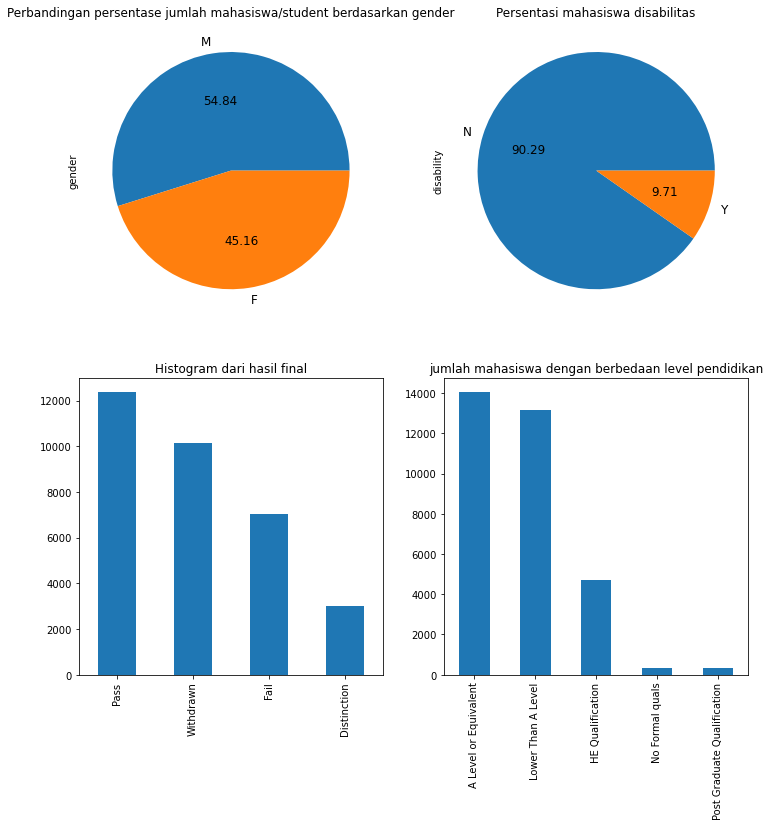

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
plt.subplot(221)
g=data_studentInfo.gender.value_counts()/len(data_studentInfo.gender)
g.plot.pie(autopct='%.2f', fontsize=12)
plt.title("Perbandingan persentase jumlah mahasiswa/student berdasarkan gender")

plt.subplot(223)
data_studentInfo['final_result'].value_counts().plot.bar()
plt.title("Histogram dari hasil final")

plt.subplot(222)
d=data_studentInfo.disability.value_counts()/len(data_studentInfo.disability)
d.plot.pie(autopct='%.2f', fontsize=12)
plt.title("Persentase mahasiswa disabilitas")

plt.subplot(224)
data_studentInfo['highest_education'].value_counts().plot.bar()
plt.title("jumlah mahasiswa dengan berbedaan level pendidikan")

A Level or Equivalent


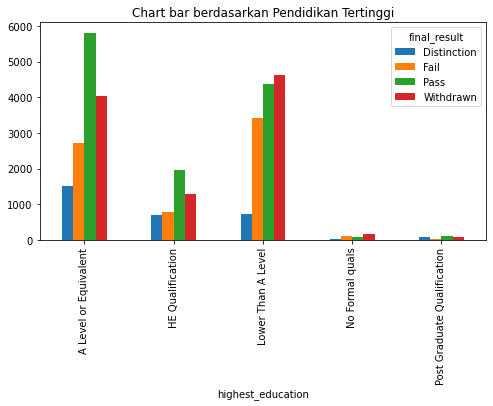

In [50]:
edu_details=data_studentInfo.groupby(['highest_education'])['highest_education'].count()
labels=edu_details.keys().values
print(labels[0])

data_studentInfo.groupby(['highest_education','final_result']).size().unstack().plot(kind='bar', title='Chart bar berdasarkan Pendidikan Tertinggi',figsize=(8,4))
plt.show()

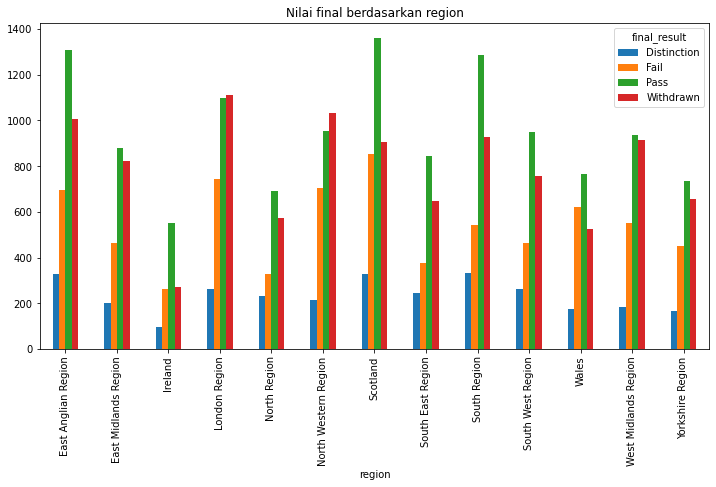

In [51]:
data_studentInfo.groupby(['region','final_result']).size().unstack().plot(kind='bar', title='Nilai final berdasarkan region',figsize=(12,6))
plt.show()

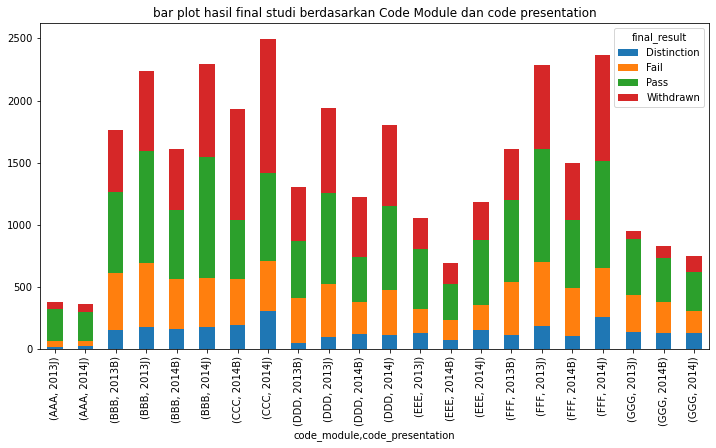

In [52]:
data_studentInfo.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', stacked=True, title='bar plot hasil final studi berdasarkan Code Module dan code presentation',figsize=(12,6))
plt.show()

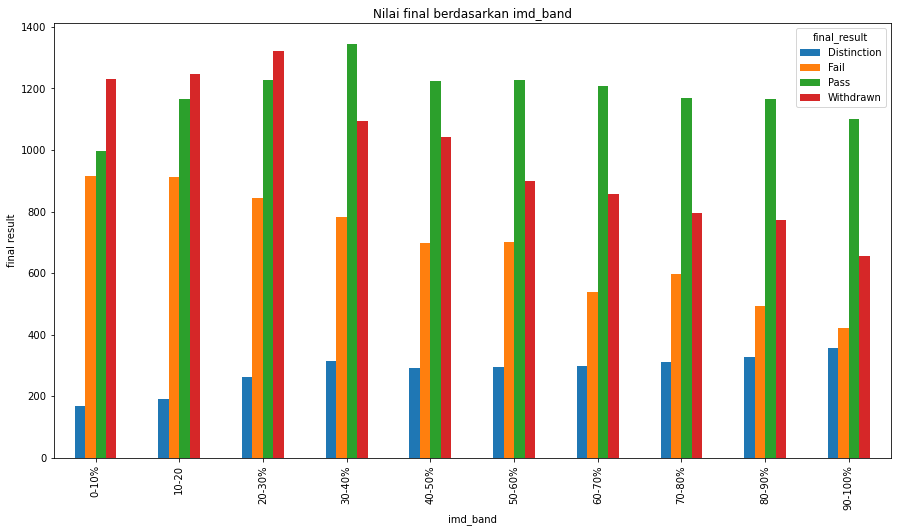

In [53]:
data_studentInfo.groupby(['imd_band','final_result']).size().unstack().plot(kind='bar',figsize=(15,8))
plt.xlabel('imd_band')
plt.ylabel('final result')
plt.title('Nilai final berdasarkan imd_band')
plt.show()

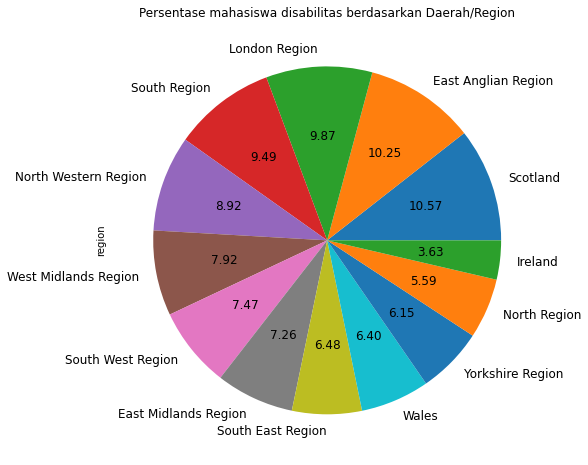

In [54]:
d=data_studentInfo.region.value_counts()/len(data_studentInfo.disability)
d.plot.pie(autopct='%.2f', fontsize=12,figsize=(10,8))
plt.title("Persentase mahasiswa disabilitas berdasarkan Daerah/Region")
plt.show()

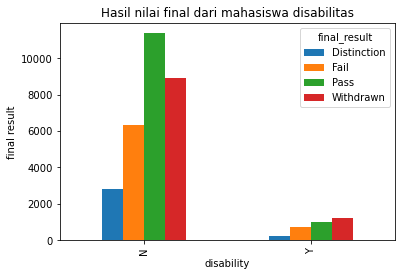

In [55]:
data_studentInfo.groupby(['disability','final_result']).size().unstack().plot(kind='bar')
plt.xlabel('disability')
plt.ylabel('final result')
plt.title('Hasil nilai final dari mahasiswa disabilitas')
plt.show()

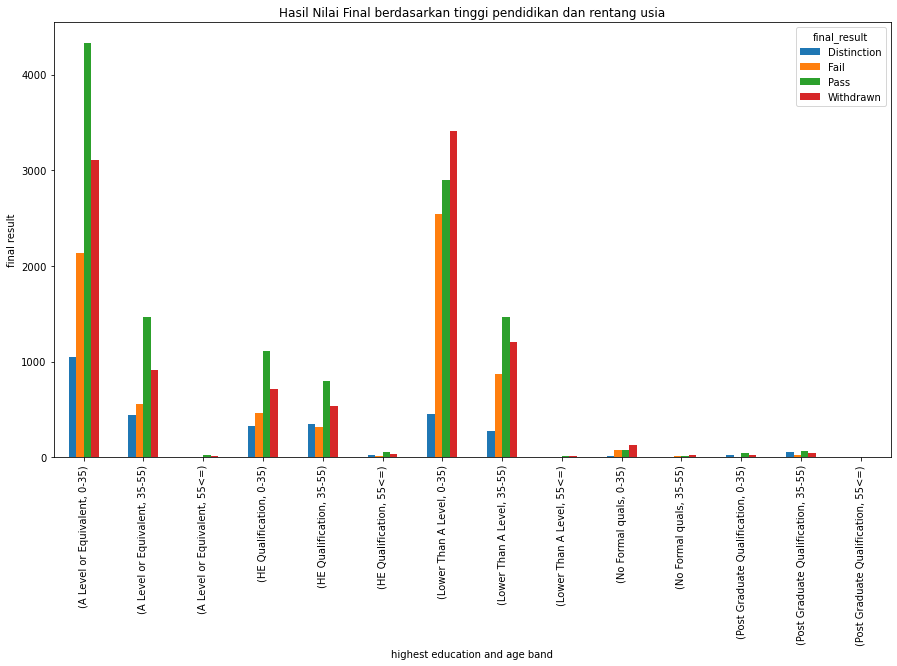

In [56]:
data_studentInfo.groupby(['highest_education','age_band','final_result']).size().unstack().plot(kind='bar',figsize=(15,8))
plt.xlabel('highest education and age band')
plt.ylabel('final result')
plt.title('Hasil Nilai Final berdasarkan tinggi pendidikan dan rentang usia')
plt.show()

## Data Modeling 

In [57]:
#membuat label untuk atribut yang berbeda

cat_columns=data_studentInfo.columns[data_studentInfo.dtypes==object].tolist()
cat_columns.remove("final_result")

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for arg in cat_columns:    
    le.fit(data_studentInfo[arg].values)    
    data_studentInfo[arg]=le.transform(data_studentInfo[arg])

In [58]:
#memberikan label pada target kelas

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(data_studentInfo["final_result"].values)

clases={}
for arg in data_studentInfo["final_result"].unique():   
    clases[arg]=le.transform([arg])[0]
    
data_studentInfo["final_result"]=le.transform(data_studentInfo["final_result"])
print(clases)

data_studentInfo.pop("id_student")
data_studentInfo.head()

{'Pass': 2, 'Withdrawn': 3, 'Fail': 1, 'Distinction': 0}


,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,...,sum_clicks40,sum_clicks60,sum_clicks80,sum_clicks100,mean_clicks0,mean_clicks20,mean_clicks40,mean_clicks60,mean_clicks80,mean_clicks100
0,0,1,1,0,1,9,2,0,240,0,...,628,713,791,934,6.904545,4.723002,4.206386,4.415033,4.424001,4.250956
1,0,1,0,6,1,2,1,0,60,0,...,874,1063,1417,1435,3.287954,3.154050,2.857137,2.625161,2.798992,2.732375
2,0,1,0,5,0,3,1,0,60,1,...,281,281,281,281,2.491162,3.469192,3.469192,3.469192,3.469192,3.469192
3,0,1,0,7,0,5,1,0,60,0,...,1181,1550,1896,2158,3.624762,2.956942,3.139172,3.025253,2.986959,3.007250
4,0,1,0,11,2,5,0,0,60,0,...,742,826,913,1034,3.954785,3.510630,3.285475,3.027455,2.813736,2.685387


In [59]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def fit_model(modeltype,X,y,kf):
    
    perform_table={"precision":[],"recall":[],"fscore":[],"mat":[]
                  ,"precision_avgd":[],"recall_avgd":[],"fscore_avgd":[]} 
    
    for train,test in tqdm(kf.split(X)):
        
        if modeltype=="DecisionTree":
            model = DecisionTreeClassifier(class_weight='balanced')
            
        elif modeltype=="RandomForest":
            model = RandomForestClassifier(n_estimators=100,class_weight='balanced')

            
        model.fit(X[train,:], y[train,])        
        y_pred = model.predict(X[test,:])
        
        perform_table["mat"].append(confusion_matrix(y_pred,y[test,]))
        
        dum=precision_recall_fscore_support(y_pred,y[test,])
        perform_table["precision"].append(dum[0])
        perform_table["recall"].append(dum[1])
        perform_table["fscore"].append(dum[2])
        
        dum=np.array(precision_recall_fscore_support(y_pred,y[test,], average='weighted'))
        perform_table["precision_avgd"].append(dum[0])
        perform_table["recall_avgd"].append(dum[1])
        perform_table["fscore_avgd"].append(dum[2])
    
    mat=perform_table["mat"][0]
    precision=perform_table["precision"][0]
    recall=perform_table["recall"][0]
    fscore=perform_table["fscore"][0]
    precision_avgd=perform_table["precision_avgd"][0]
    recall_avgd=perform_table["recall_avgd"][0]
    fscore_avgd=perform_table["fscore_avgd"][0]
    Nlen=len(perform_table["mat"])
    
    for i in range(1,Nlen):
        mat=mat+perform_table["mat"][i]
        precision=precision+perform_table["precision"][i]
        recall=recall+perform_table["recall"][i]
        fscore=fscore+perform_table["fscore"][i]
        
        precision_avgd=precision_avgd+perform_table["precision_avgd"][i]
        recall_avgd=recall_avgd+perform_table["recall_avgd"][i]
        fscore_avgd=fscore_avgd+perform_table["fscore_avgd"][i]

    perform_table["mat"]=mat
    perform_table["precision"]=precision/Nlen
    perform_table["recall"]=recall/Nlen
    perform_table["fscore"]=fscore/Nlen

    perform_table["precision_avgd"]=precision_avgd/Nlen
    perform_table["recall_avgd"]=recall_avgd/Nlen
    perform_table["fscore_avgd"]=fscore_avgd/Nlen
    
    return perform_table

In [60]:
def update_perform_table(model_table,model_type,index,update="New",detailed_table=None):
    
    if update=="New":
        detailed_table={}
        
        dum=list(model_table['precision'])
        dum.append((model_table['precision_avgd']))        
        detailed_table["precision"]=dum
        
        dum=list(model_table['recall'])
        dum.append((model_table['recall_avgd']))        
        detailed_table["recall"]=dum

        dum=list(model_table['fscore'])
        dum.append((model_table['fscore_avgd']))        
        detailed_table["fscore"]=dum
        
        pred=model_table['mat'].diagonal()
        true=np.sum(model_table['mat'],axis=1)   
        
        dum=list(pred/true)        
        dum.append(np.sum(pred)/np.sum(true))
        detailed_table["accuracy"]=dum
                
        detailed_table["precision"]=pd.DataFrame(detailed_table["precision"],index=index)
        detailed_table["precision"]=detailed_table["precision"].rename(columns={0:model_type})
        detailed_table["precision"].columns.name="Precision"

        detailed_table["recall"]=pd.DataFrame(detailed_table["recall"],index=index)
        detailed_table["recall"]=detailed_table["recall"].rename(columns={0:model_type})
        detailed_table["recall"].columns.name="Recall"

        detailed_table["fscore"]=pd.DataFrame(detailed_table["fscore"],index=index)
        detailed_table["fscore"]=detailed_table["fscore"].rename(columns={0:model_type})
        detailed_table["fscore"].columns.name="F-score"

        detailed_table["accuracy"]=pd.DataFrame(detailed_table["accuracy"],index=index)
        detailed_table["accuracy"]=detailed_table["accuracy"].rename(columns={0:model_type})
        detailed_table["accuracy"].columns.name="Accuracy"
        
    else:
        
        dum=list(model_table['precision'])
        dum.append((model_table['precision_avgd']))     
        detailed_table["precision"][model_type]=dum
        
        dum=list(model_table['recall'])
        dum.append((model_table['recall_avgd']))        
        detailed_table["recall"][model_type]=dum

        dum=list(model_table['fscore'])
        dum.append((model_table['fscore_avgd']))        
        detailed_table["fscore"][model_type]=dum
        
        pred=model_table['mat'].diagonal()
        true=np.sum(model_table['mat'],axis=1)   
        
        dum=list(pred/true)        
        dum.append(np.sum(pred)/np.sum(true))
        detailed_table["accuracy"][model_type]=dum
        
    return detailed_table

from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import copy

x_clmns=list(columns_info.values)
remove_clmns=["final_result","id_student"]

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)

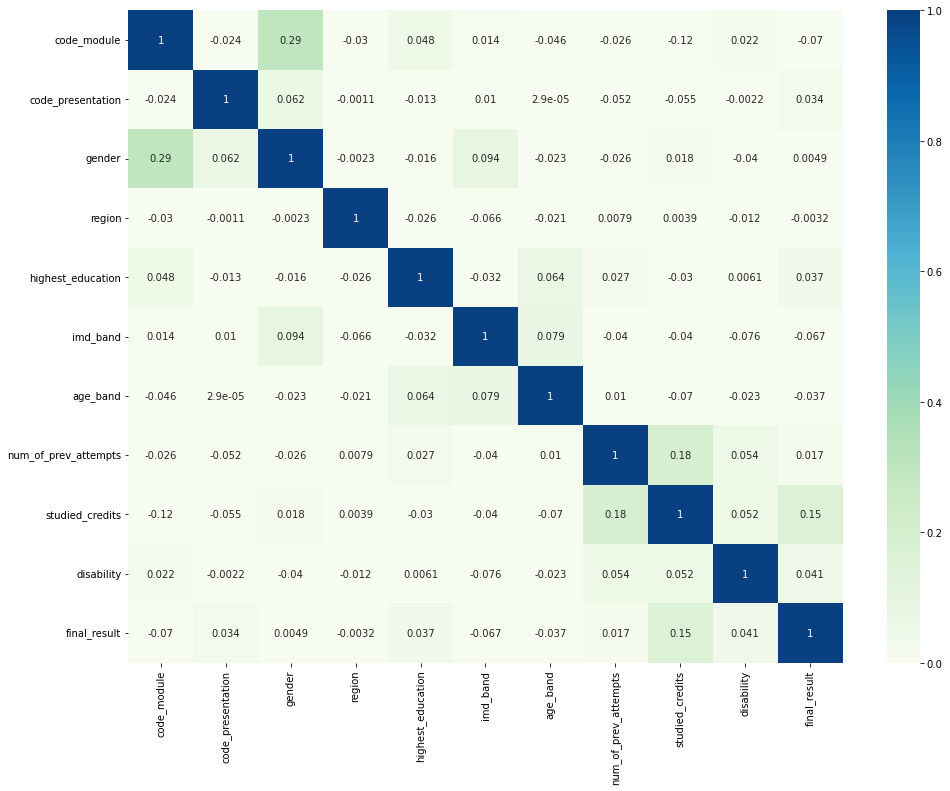

In [62]:
import copy
dum=copy.deepcopy(x_clmns)
dum.append("final_result")

plt.figure(figsize=(16,12))
sns.heatmap(data_studentInfo[dum].corr(), annot = True, vmin = 0, cmap = 'GnBu')
plt.show()

In [65]:
#Berdasakan informasi biografi

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="DecisionTree"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index)

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)

display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:00, 13.54it/s]
10it [00:22,  2.21s/it]


Precision,DecisionTree,RandomForest
Distinction,0.207677,0.152773
Fail,0.289142,0.249674
Pass,0.357525,0.449832
Withdrawn,0.363989,0.426205
Averaged,0.322816,0.377715
Recall,DecisionTree,RandomForest
Distinction,0.143499,0.165348
Fail,0.255731,0.275575
Pass,0.423213,0.435546
Withdrawn,0.377894,0.407097


In [66]:
#berdasarkan Biografi dan Vle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import copy

x_clmns=list(columns_info.values)
for arg in list(columns_vle.values):
    x_clmns.append(arg)
x_clmns=list(set(x_clmns))
    
remove_clmns=["final_result","id_student"]

notreq_len=[20,40,60,80]
# notreq_len=[]
for arg in notreq_len:
    remove_clmns.append("mean_clicks"+str(arg))
    remove_clmns.append("sum_clicks"+str(arg))
    
for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)

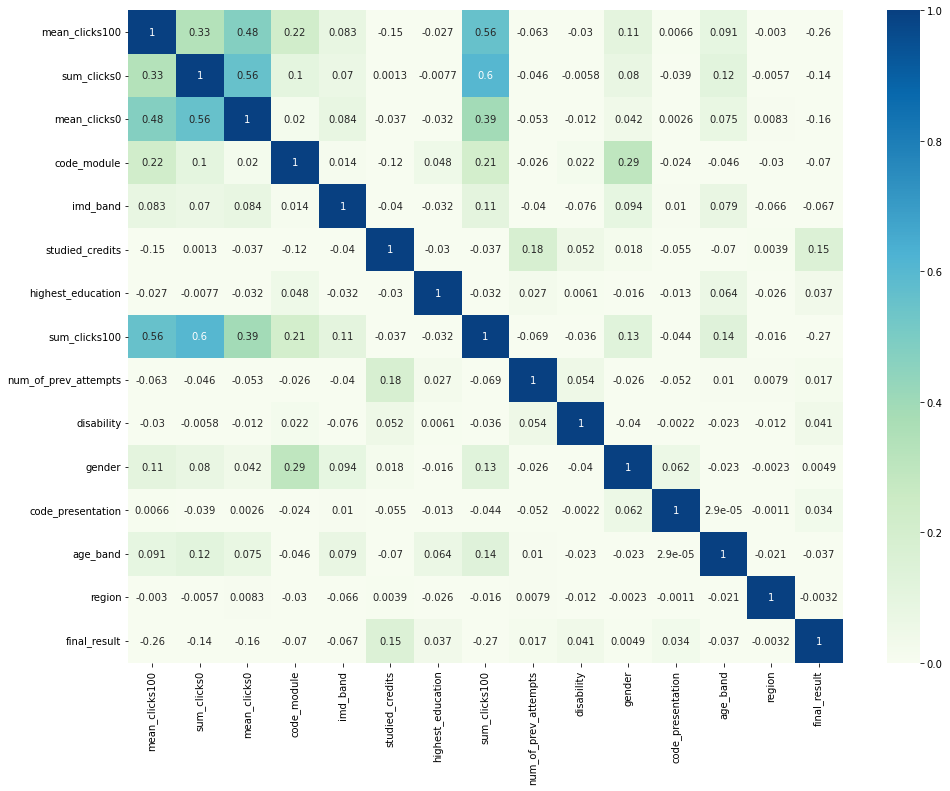

In [67]:
import copy
dum=copy.deepcopy(x_clmns)
dum.append("final_result")

plt.figure(figsize=(16,12))
sns.heatmap(data_studentInfo[dum].corr(), annot = True, vmin = 0, cmap = 'GnBu')
plt.show()

In [68]:
index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="DecisionTree"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index)

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)


display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:01,  5.54it/s]
10it [00:33,  3.32s/it]


Precision,DecisionTree,RandomForest
Distinction,0.243434,0.053069
Fail,0.344119,0.282710
Pass,0.611832,0.908536
Withdrawn,0.624802,0.717005
Averaged,0.522856,0.761412
Recall,DecisionTree,RandomForest
Distinction,0.243173,0.453690
Fail,0.338314,0.489715
Pass,0.616028,0.624448
Withdrawn,0.627946,0.714885


In [69]:
#berdasarkan Biographic + VLE + assements
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

x_clmns=data_studentInfo.columns.tolist()
remove_clmns=["final_result","mean_clicks0","sum_clicks0"]

notreq_len=[20,40,60,80]
# notreq_len=[]
for arg in notreq_len:
    remove_clmns.append("CS"+str(arg))
    remove_clmns.append("PCS"+str(arg))
    remove_clmns.append("LS"+str(arg))
    remove_clmns.append("mean_clicks"+str(arg))
    remove_clmns.append("sum_clicks"+str(arg))
    remove_clmns.append("RS"+str(arg))

for arg in remove_clmns:
    x_clmns.remove(arg)   

y_clmns=["final_result"]

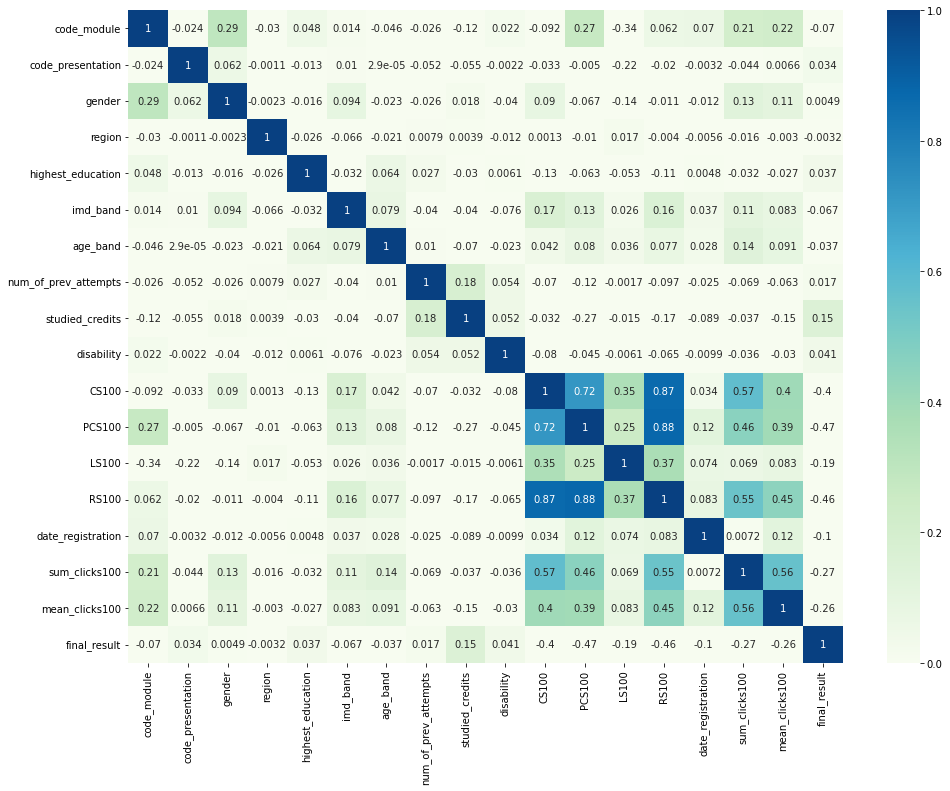

In [70]:
import copy
dum=copy.deepcopy(x_clmns)
dum.append("final_result")

plt.figure(figsize=(16,12))
sns.heatmap(data_studentInfo[dum].corr(), annot = True, vmin = 0, cmap = 'GnBu')
plt.show()

In [71]:
#menggunakan seluruh kolom

X=data_studentInfo[x_clmns].values
y=data_studentInfo[y_clmns].values[:,0]
nfolds=10

kf = KFold(n_splits=nfolds,shuffle=True,random_state=1)

index=list(le.inverse_transform(np.unique(y)))
index.append("Averaged")

model_type="DecisionTree"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index)

model_type="RandomForest"
model_table=fit_model(model_type,X,y,kf)
detailed_table=update_perform_table(model_table,model_type,index,update="Update",detailed_table=detailed_table)


display_side_by_side(detailed_table["precision"],detailed_table["recall"],
                     detailed_table["fscore"],detailed_table["accuracy"])

10it [00:02,  4.05it/s]
10it [00:44,  4.40s/it]


Precision,DecisionTree,RandomForest
Distinction,0.478248,0.454900
Fail,0.415468,0.366073
Pass,0.753849,0.902574
Withdrawn,0.703239,0.832428
Averaged,0.639657,0.776488
Recall,DecisionTree,RandomForest
Distinction,0.494848,0.658988
Fail,0.411155,0.581022
Pass,0.748939,0.757621
Withdrawn,0.706975,0.746131
